# Lezione 8: La Random Forest - La Saggezza della Folla 🌲🌳🌲

Nella lezione precedente abbiamo visto la forza di un albero decisionale: la sua trasparenza. Tuttavia, gli alberi singoli hanno un grande difetto: tendono a diventare "troppo studiosi".

Questo problema si chiama **Overfitting**.

**Analogia dello Studente:**
Immagina uno studente che, invece di imparare i concetti generali di una materia, impara a memoria le risposte esatte di ogni singolo esercizio del libro. Quando arriva il giorno dell'esame (con esercizi nuovi ma simili), questo studente va in crisi, perché non ha imparato a **generalizzare**.

Un albero decisionale, se non viene limitato (ad esempio con `max_depth`), farà la stessa cosa: continuerà a creare nuove ramificazioni fino a quando non avrà una "foglia" per ogni singolo campione del training set. Diventerà un esperto perfetto dei dati di addestramento, ma farà molta fatica a classificare correttamente dati nuovi, perché ha imparato a memoria anche il "rumore" e le piccole eccezioni.

**La Soluzione: Chiedere a un Gruppo di Esperti**
Invece di fidarci del giudizio di un singolo "studente-esperto", perché non chiediamo l'opinione di un'intera commissione di studenti, ognuno dei quali ha studiato in modo leggermente diverso?

Questa è l'idea alla base del **Random Forest**: un modello composto non da un albero, ma da **centinaia di alberi decisionali diversi**. Per classificare un nuovo dato, si chiede il parere di ogni albero della foresta e si sceglie la classe che riceve più "voti".

Questo approccio si chiama **Ensemble Learning** (apprendimento d'insieme).

Perché questo metodo funzioni, gli alberi nella foresta devono essere **diversi** tra loro. Se fossero tutti identici, darebbero tutti la stessa risposta e non ci sarebbe nessun vantaggio.

La "casualità" viene introdotta in due modi:

1.  **Dati Casuali (Bagging)**: Ogni albero non viene addestrato su tutto il training set, ma solo su un **sottoinsieme casuale** di dati. È come se ogni "studente" della nostra commissione studiasse solo su alcuni capitoli del libro, scelti a caso.
2.  **Feature Casuali**: Ad ogni divisione dell'albero, l'algoritmo non considera tutte le feature disponibili per trovare la domanda migliore, ma solo un **sottoinsieme casuale** di feature.

Questo assicura che ogni albero diventi un "esperto" di una piccola parte del problema, e la combinazione delle loro diverse "opinioni" porta a una decisione finale molto più robusta e generalizzabile.

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# --- Ricarichiamo e prepariamo i dati come prima ---
df_penguins = sns.load_dataset('penguins').dropna()
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
target = 'species'
X = df_penguins[features]
y = df_penguins[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Creiamo il modello Random Forest
# n_estimators è il numero di alberi nella foresta. Iniziamo con 100.
modello_foresta = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Addestriamo il modello sul training set
modello_foresta.fit(X_train, y_train)

print("✅ Modello Random Forest addestrato!")

# 3. Valutiamo il modello sul test set
y_pred_foresta = modello_foresta.predict(X_test)
accuratezza_foresta = accuracy_score(y_test, y_pred_foresta)

print(f"\nL'accuratezza della nostra Random Forest sul test set è: {accuratezza_foresta:.2%}")

# Ricordiamo l'accuratezza del singolo albero della lezione precedente (che era circa 97.06%)
# A seconda della divisione dei dati, la foresta è spesso più accurata.

✅ Modello Random Forest addestrato!

L'accuratezza della nostra Random Forest sul test set è: 99.00%


Abbiamo guadagnato in accuratezza, ma abbiamo perso la trasparenza. Non possiamo più visualizzare 100 alberi e capire facilmente cosa sta succedendo. La Random Forest è un modello **"scatola nera" (black box)**.

Tuttavia, ci offre un nuovo, potentissimo strumento di analisi: la **Feature Importance**.

Poiché la foresta ha usato tante volte tutte le feature in modi diversi, può dirci quali di esse sono state, in media, le **più decisive** per prendere le decisioni corrette. È come chiedere alla commissione di studenti: "Quale capitolo del libro è stato più utile per superare l'esame?".

Questo ci aiuta a capire quali dati sono davvero importanti per il nostro problema.

Importanza di ogni feature secondo il modello:


,Feature,Importanza
0,bill_length_mm,0.370147
1,bill_depth_mm,0.316284
2,flipper_length_mm,0.237150
3,body_mass_g,0.076420


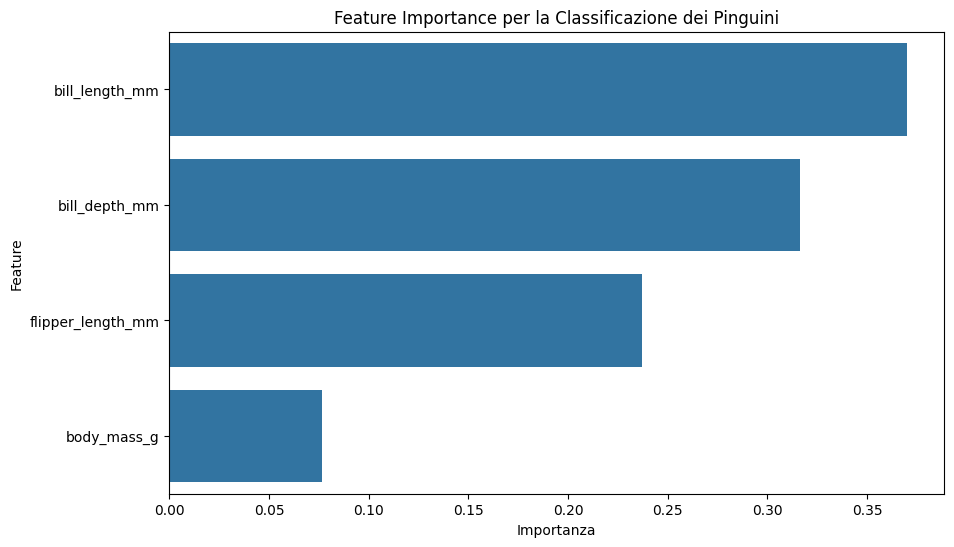

In [4]:
# Il modello addestrato contiene l'attributo .feature_importances_
importanze = modello_foresta.feature_importances_

# Creiamo un DataFrame per visualizzare meglio i risultati
df_importanze = pd.DataFrame({
    'Feature': features,
    'Importanza': importanze
}).sort_values(by='Importanza', ascending=False)

import matplotlib.pyplot as plt # Import matplotlib.pyplot

print("Importanza di ogni feature secondo il modello:")
display(df_importanze)

# Creiamo un grafico a barre per una visualizzazione più chiara
plt.figure(figsize=(10, 6))
sns.barplot(x='Importanza', y='Feature', data=df_importanze)
plt.title('Feature Importance per la Classificazione dei Pinguini')
plt.show()

Dal grafico, vediamo che la lunghezza delle pinne (`flipper_length_mm`) e la lunghezza del becco (`bill_length_mm`) sono state di gran lunga le caratteristiche più utili per distinguere le specie di pinguini. La massa corporea, invece, è stata meno decisiva.

### Riepilogo: Albero Singolo vs. Foresta

| Caratteristica | Albero Decisionale Singolo | Random Forest |
| :--- | :--- | :--- |
| **Performance** | Buona, ma a rischio di overfitting. | Generalmente più alta e più stabile. |
| **Interpretabilità** | **Alta (Scatola Bianca)**. Possiamo vedere ogni regola. | **Bassa (Scatola Nera)**. Il processo è opaco. |
| **Strumento di Analisi**| Visualizzazione dell'albero. | **Feature Importance**. |

Abbiamo concluso il nostro viaggio nei modelli basati su alberi. Ora abbiamo le basi per affrontare l'ultima grande famiglia di modelli: le **Reti Neurali**.